<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# **Praktikum 2**

Group Number: 50

Group Members:

- Refki Alfarizi (13523002)
- Razi Rachman Widyadhana (13523004)

<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Daftar Isi

1. [**Introduction**](#1)

2. [**Initialization**](#2)

3. [**Preprocessing**](#3)

4. [**Modelling**](#4)

5. [**Reduplication & Submission**](#5)

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Introduction <a name="1"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## Permasalahan

---

## Dataset

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Initialization <a name="2"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## 1. Pustaka

In [ ]:
import io
import os
import copy

import math
import random
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, mutual_info_regression

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

---

## 2. Konfigurasi

In [ ]:
class Settings:
    SEED = 42
    SPLITS = 5
    CMAP = "flare"

np.random.seed(Settings.SEED)
random.seed(Settings.SEED)
pd.set_option('display.max_columns', None)

rc_params = {
    "grid.color": "#EBEBE7",
    "font.family": "serif",
}

plt.rcParams.update(rc_params)

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Exploratory Data Analysis <a name="2"></a>

Analisis Data Eksplorasi (EDA) adalah proses pemeriksaan dan peringkasan dataset untuk mengungkap pola, tren, dan anomali. Dengan menggunakan visualisasi seperti histogram dan grafik lainnya, serta ukuran statistik seperti rata-rata dan korelasi.

EDA membantu memahami struktur data dan hubungan antar variabel. Proses ini mengidentifikasi outlier dan nilai yang hilang, memandu pembersihan data, serta memberikan wawasan untuk analisis atau pemodelan selanjutnya.

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## 1. Load Data

In [ ]:
import gdown
import pandas as pd

urls = {
    "PenilaianMahasiswa": "https://drive.google.com/uc?id=1gdPFCjUdScydTFgAOj9raM-YS1s_ysBS",
    "PendaftaranMahasiswa": "https://drive.google.com/uc?id=1Op5Uzn2CSpVBf0vsq0x9mcH12QbXTJxH",
    "LingkunganBelajarVirtualMahasiswa": "https://drive.google.com/uc?id=1fybMNZik_Q43EssMr5Q2U-GBsAE3Fowd",
    "LingkunganBelajarVirtual": "https://drive.google.com/uc?id=1qbFKfj7HefmMollbfqMKhwprE7aOt835",
    "Kursus": "https://drive.google.com/uc?id=1JLFwZeY9Pcob4HvwWB9XjxwszhPRsxNU",
    "InfoMahasiswa": "https://drive.google.com/uc?id=1_07Us4bkpER9oX5MRuqyPcLTp1w8486_",
    "Assessment": "https://drive.google.com/uc?id=1DTg7a1ScDD8NmWU0onITgD5BG1k2VGPs",
}

dfs = {}
for name, url in urls.items():
    output = f"{name}.csv"
    gdown.download(url, output, quiet=False)
    dfs[name] = pd.read_csv(output)

# Contoh Akses
df_penilaian = dfs["PenilaianMahasiswa"]
df_pendaftaran = dfs["PendaftaranMahasiswa"]

Downloading...
From: https://drive.google.com/uc?id=1gdPFCjUdScydTFgAOj9raM-YS1s_ysBS
To: /content/PenilaianMahasiswa.csv
100%|██████████| 3.95M/3.95M [00:00<00:00, 5.18MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Op5Uzn2CSpVBf0vsq0x9mcH12QbXTJxH
To: /content/PendaftaranMahasiswa.csv
100%|██████████| 784k/784k [00:00<00:00, 6.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fybMNZik_Q43EssMr5Q2U-GBsAE3Fowd
To: /content/LingkunganBelajarVirtualMahasiswa.csv
100%|██████████| 32.0M/32.0M [00:00<00:00, 74.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qbFKfj7HefmMollbfqMKhwprE7aOt835
To: /content/LingkunganBelajarVirtual.csv
100%|██████████| 184k/184k [00:00<00:00, 3.02MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JLFwZeY9Pcob4HvwWB9XjxwszhPRsxNU
To: /content/Kursus.csv
100%|██████████| 381/381 [00:00<00:00, 1.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_07Us4bkpER9oX5MRuqyPcLTp1w8486_
To: /content/InfoMahasiswa.csv
100%|

---

## 2. Data Understanding
Tujuan: Memahami struktur, kualitas, dan distribusi data.

### 2.1 Struktur dan Tipe Data

Pengecekan tipe kolom dan konsistensi skema pada tiap tabel

#### 2.1.1 Helper Ringkasan Tipe Kolom

Fungsi utilitas untuk mengekstrak ringkasan df.info() menjadi tabel yang mudah dibaca.

In [ ]:
def check_types(df):
    buffer = io.StringIO()
    df.info(buf=buffer)

    lines = buffer.getvalue().splitlines()
    types_info = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())).drop(['Count', 'Non-Null', '#'], axis=1)

    return types_info.set_index('Column')

#### 2.1.2 Struktur PenilaianMahasiswa

Pemeriksaan kolom inti (id_assessment, id_mahasiswa, tanggal_dikirim, skor) dan memastikan id_assessment integer/consistent untuk join ke Assessment.

In [ ]:
dfs["PenilaianMahasiswa"]

,id_assessment,id_mahasiswa,tanggal_dikirim,apakah_tersimpan,skor
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [ ]:
check_types(dfs["PenilaianMahasiswa"])

,Dtype
Column,
id_assessment,int64
id_mahasiswa,int64
tanggal_dikirim,int64
apakah_tersimpan,int64
skor,float64


#### 2.1.3 Struktur PendaftaranMahasiswa

Memvalidasi kunci (kode_modul, kode_presentasi, id_mahasiswa); tanggal_pendaftaran/tanggal_pembatalan_pendaftaran bisa bernilai negatif/NaN sesuai definisi.

In [ ]:
dfs["PendaftaranMahasiswa"]

,kode_modul,kode_presentasi,id_mahasiswa,tanggal_pendaftaran,tanggal_pembatalan_pendaftaran
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [ ]:
check_types(dfs["PendaftaranMahasiswa"])

,Dtype
Column,
kode_modul,object
kode_presentasi,object
id_mahasiswa,int64
tanggal_pendaftaran,float64
tanggal_pembatalan_pendaftaran,float64


#### 2.1.4 Struktur LingkunganBelajarVirtualMahasiswa

Data granular per akses (tanggal, jumlah_klik) dengan kunci (id_situs, kode_modul, kode_presentasi, id_mahasiswa); besar dan perlu agregasi nanti.

In [ ]:
dfs["LingkunganBelajarVirtualMahasiswa"]

,kode_modul,kode_presentasi,id_mahasiswa,id_situs,tanggal,jumlah_klik
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
1048570,BBB,2013J,609046,704113,133,1
1048571,BBB,2013J,609046,703735,133,1
1048572,BBB,2013J,609307,703732,133,1
1048573,BBB,2013J,609307,703732,133,1


In [ ]:
check_types(dfs["LingkunganBelajarVirtualMahasiswa"])

,Dtype
Column,
kode_modul,object
kode_presentasi,object
id_mahasiswa,int64
id_situs,int64
tanggal,int64
jumlah_klik,int64


#### 2.1.5 Struktur LingkunganBelajarVirtual

In [ ]:
dfs["LingkunganBelajarVirtual"]

,id_situs,kode_modul,kode_presentasi,tipe_aktivitas,minggu_mulai,minggu_selesai
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [ ]:
check_types(dfs["LingkunganBelajarVirtual"])

,Dtype
Column,
id_situs,int64
kode_modul,object
kode_presentasi,object
tipe_aktivitas,object
minggu_mulai,float64
minggu_selesai,float64


#### 2.1.6 Struktur Kursus

In [ ]:
dfs["Kursus"]

,kode_modul,kode_presentasi,panjang_modul_presentasi
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
check_types(dfs["Kursus"])

,Dtype
Column,
kode_modul,object
kode_presentasi,object
panjang_modul_presentasi,int64


#### 2.1.7 Struktur InfoMahasiswa

In [ ]:
dfs["InfoMahasiswa"]

,kode_modul,kode_presentasi,id_mahasiswa,jenis_kelamin,wilayah,pendidikan_tertinggi,imd,rentang_usia,jumlah_attempts_sebelumnya,kredit_mahasiswa,disabilitas,hasil_akhir
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
check_types(dfs["InfoMahasiswa"])

,Dtype
Column,
kode_modul,object
kode_presentasi,object
id_mahasiswa,int64
jenis_kelamin,object
wilayah,object
pendidikan_tertinggi,object
imd,object
rentang_usia,object
jumlah_attempts_sebelumnya,int64


#### 2.1.8 Struktur Assessment

In [ ]:
dfs["Assessment"]

,kode_modul,kode_presentasi,id_assessment,tipe_assessment,tanggal,bobot
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [ ]:
check_types(dfs["Assessment"])

,Dtype
Column,
kode_modul,object
kode_presentasi,object
id_assessment,int64
tipe_assessment,object
tanggal,float64
bobot,float64


### 2.2 Missing & Duplikasi

Perkecil proporsi NaN per kolom dan pengecekan baris yang duplikat. Hasil ini akan menjadi dasar dari proses imputasi, drop, atau pembiaran nantinya.

In [ ]:
def missing_values_summary(df):
  missing_count = df.isnull().sum().rename('Missing Count')
  missing_ratio = (df.isnull().mean()*100).rename('Missing Percentage (%)')
  summary = missing_count.to_frame().join(missing_ratio.to_frame())

  return summary

In [ ]:
missing_values_summary(dfs["PenilaianMahasiswa"])

,Missing Count,Missing Percentage (%)
id_assessment,0,0.000000
id_mahasiswa,0,0.000000
tanggal_dikirim,0,0.000000
apakah_tersimpan,0,0.000000
skor,173,0.099476


In [ ]:
dfs["PenilaianMahasiswa"][dfs["PenilaianMahasiswa"].duplicated(keep=False)]

,id_assessment,id_mahasiswa,tanggal_dikirim,apakah_tersimpan,skor


In [ ]:
missing_values_summary(dfs["PendaftaranMahasiswa"])

,Missing Count,Missing Percentage (%)
kode_modul,0,0.000000
kode_presentasi,0,0.000000
id_mahasiswa,0,0.000000
tanggal_pendaftaran,45,0.138066
tanggal_pembatalan_pendaftaran,22521,69.097659


In [ ]:
dfs["PendaftaranMahasiswa"][dfs["PendaftaranMahasiswa"].duplicated(keep=False)]

,kode_modul,kode_presentasi,id_mahasiswa,tanggal_pendaftaran,tanggal_pembatalan_pendaftaran


In [ ]:
missing_values_summary(dfs["LingkunganBelajarVirtualMahasiswa"])

,Missing Count,Missing Percentage (%)
kode_modul,0,0.0
kode_presentasi,0,0.0
id_mahasiswa,0,0.0
id_situs,0,0.0
tanggal,0,0.0
jumlah_klik,0,0.0


In [ ]:
dfs["LingkunganBelajarVirtualMahasiswa"][dfs["LingkunganBelajarVirtualMahasiswa"].duplicated(keep=False)]

,kode_modul,kode_presentasi,id_mahasiswa,id_situs,tanggal,jumlah_klik
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
62,AAA,2013J,45462,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
178,AAA,2013J,77367,546652,-10,4
...,...,...,...,...,...,...
1048533,BBB,2013J,603270,704205,133,1
1048550,BBB,2013J,607735,703741,133,1
1048551,BBB,2013J,607735,703741,133,1
1048572,BBB,2013J,609307,703732,133,1


In [ ]:
missing_values_summary(dfs["LingkunganBelajarVirtual"])

,Missing Count,Missing Percentage (%)
id_situs,0,0.000000
kode_modul,0,0.000000
kode_presentasi,0,0.000000
tipe_aktivitas,0,0.000000
minggu_mulai,5243,82.385292
minggu_selesai,5243,82.385292


In [ ]:
dfs["LingkunganBelajarVirtual"][dfs["LingkunganBelajarVirtual"].duplicated(keep=False)]

,id_situs,kode_modul,kode_presentasi,tipe_aktivitas,minggu_mulai,minggu_selesai


In [ ]:
missing_values_summary(dfs["Kursus"])

,Missing Count,Missing Percentage (%)
kode_modul,0,0.0
kode_presentasi,0,0.0
panjang_modul_presentasi,0,0.0


In [ ]:
dfs["Kursus"][dfs["Kursus"].duplicated(keep=False)]

,kode_modul,kode_presentasi,panjang_modul_presentasi


In [ ]:
missing_values_summary(dfs["InfoMahasiswa"])

,Missing Count,Missing Percentage (%)
kode_modul,0,0.000000
kode_presentasi,0,0.000000
id_mahasiswa,0,0.000000
jenis_kelamin,0,0.000000
wilayah,0,0.000000
pendidikan_tertinggi,0,0.000000
imd,1111,3.408707
rentang_usia,0,0.000000
jumlah_attempts_sebelumnya,0,0.000000
kredit_mahasiswa,0,0.000000


In [ ]:
dfs["InfoMahasiswa"][dfs["InfoMahasiswa"].duplicated(keep=False)]

,kode_modul,kode_presentasi,id_mahasiswa,jenis_kelamin,wilayah,pendidikan_tertinggi,imd,rentang_usia,jumlah_attempts_sebelumnya,kredit_mahasiswa,disabilitas,hasil_akhir


In [ ]:
missing_values_summary(dfs["Assessment"])

,Missing Count,Missing Percentage (%)
kode_modul,0,0.000000
kode_presentasi,0,0.000000
id_assessment,0,0.000000
tipe_assessment,0,0.000000
tanggal,11,5.339806
bobot,0,0.000000


In [ ]:
dfs["Assessment"][dfs["Assessment"].duplicated(keep=False)]

,kode_modul,kode_presentasi,id_assessment,tipe_assessment,tanggal,bobot


### 2.3 Statistik Data

In [ ]:
dfs["PenilaianMahasiswa"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_assessment,173912.0,26553.803556,8829.784254,1752.0,15022.0,25359.0,34883.0,37443.0
id_mahasiswa,173912.0,705150.717225,552395.190999,6516.0,504429.0,585208.0,634498.0,2698588.0
tanggal_dikirim,173912.0,116.032942,71.484148,-11.0,51.0,116.0,173.0,608.0
apakah_tersimpan,173912.0,0.010977,0.104194,0.0,0.0,0.0,0.0,1.0
skor,173739.0,75.799573,18.798107,0.0,65.0,80.0,90.0,100.0


In [ ]:
dfs["PendaftaranMahasiswa"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_mahasiswa,32593.0,706687.669131,549167.313855,3733.0,508573.0,590310.0,644453.0,2716795.0
tanggal_pendaftaran,32548.0,-69.411300,49.260522,-322.0,-100.0,-57.0,-29.0,167.0
tanggal_pembatalan_pendaftaran,10072.0,49.757645,82.460890,-365.0,-2.0,27.0,109.0,444.0


In [ ]:
dfs["LingkunganBelajarVirtualMahasiswa"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_mahasiswa,1048575.0,793566.183384,746066.823630,6516.0,382095.0,541764.0,603270.0,2698257.0
id_situs,1048575.0,642862.636216,124031.698624,542792.0,542864.0,546697.0,703895.0,1010323.0
tanggal,1048575.0,82.311252,70.545040,-24.0,21.0,64.0,129.0,269.0
jumlah_klik,1048575.0,3.353445,5.046377,1.0,1.0,2.0,4.0,1326.0


In [ ]:
dfs["LingkunganBelajarVirtual"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_situs,6364.0,726099.094123,128315.137473,526721.0,661592.75,730096.5,814016.25,1077905.0
minggu_mulai,1121.0,15.204282,8.792865,0.0,8.00,15.0,22.00,29.0
minggu_selesai,1121.0,15.214987,8.779806,0.0,8.00,15.0,22.00,29.0


In [ ]:
dfs["Kursus"].describe().T

,count,mean,std,min,25%,50%,75%,max
panjang_modul_presentasi,22.0,255.545455,13.654677,234.0,241.0,261.5,268.0,269.0


In [ ]:
dfs["InfoMahasiswa"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_mahasiswa,32593.0,706687.669131,549167.313855,3733.0,508573.0,590310.0,644453.0,2716795.0
jumlah_attempts_sebelumnya,32593.0,0.163225,0.479758,0.0,0.0,0.0,0.0,6.0
kredit_mahasiswa,32593.0,79.758691,41.071900,30.0,60.0,60.0,120.0,655.0


In [ ]:
dfs["Assessment"].describe().T

,count,mean,std,min,25%,50%,75%,max
id_assessment,206.0,26473.975728,10098.625521,1752.0,15023.25,25364.5,34891.75,40088.0
tanggal,195.0,145.005128,76.001119,12.0,71.00,152.0,222.00,261.0
bobot,206.0,20.873786,30.384224,0.0,0.00,12.5,24.25,100.0


### 2.5 Distribusi Data

### Target Numerik

In [ ]:
# sns.set_color_codes(palette='deep')
# f, ax = plt.subplots(figsize=(15, 5), facecolor='#f5ded3')
# ax.set_facecolor('#f5ded3')

# counts = train[Settings.TARGET].values
# sns.histplot(data=train, x=Settings.TARGET, kde=True, stat='density', color='#000000', ax=ax)

# (mu, sigma) = norm.fit(counts)
# xmin, xmax = ax.get_xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, sigma)
# ax.plot(x, p, 'r-', linewidth=2, label=f'Normal dist. ($\\mu=$ {mu:.2f} and $\\sigma=$ {sigma:.2f})')

# ax.legend(loc='best')
# ax.xaxis.grid(False)
# ax.set_ylabel("Density", labelpad=15)
# ax.set_xlabel("Count", labelpad=15)
# ax.set_title("Count Distribution")
# sns.despine(trim=True, left=True)

# plt.tight_layout()
# plt.show()

### Target Label

In [ ]:
# label_map = {0: 'Non- ', 1: ' '}

# value_counts = train_df['label'].value_counts()
# value_counts

In [ ]:
# def plot_pie_chart(value_counts, w, h, fs):
#     fig, ax = plt.subplots(figsize=(w, h), facecolor='#fff0d1')
#     fig.patch.set_linewidth(2)
#     fig.patch.set_edgecolor('black')
#     colors = sns.color_palette('flare')

#     labels = [f'{label_map[label]} ({label})' for label, _ in value_counts.items()]

#     ax = plt.pie(
#         value_counts.values,
#         labels=labels,
#         autopct='%1.1f%%',
#         explode=[0.1] * len(value_counts),
#         colors=colors,
#         shadow=True,
#         startangle=75
#     )
#     plt.title('Label Distribution', fontsize=fs)
#     plt.show()

# plot_pie_chart(value_counts, 6, 6, 13)

### Numerical Features Distribution

In [ ]:
# plt.figure(figsize=(25, 15), facecolor='#f5ded3')

# for index, feature in enumerate(num_features):
    
#     ax = plt.subplot(3, 3, index + 1)
#     sns.histplot(data=train, x=feature, kde=True, stat='density', color='#000000', ax=ax)
    
#     feature_data = train[feature].dropna()
#     (mu, sigma) = norm.fit(feature_data)
    
#     xmin, xmax = ax.get_xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, sigma)
    
#     ax.plot(x, p, 'r-', linewidth=2, label=f'Normal dist. ($\\mu=$ {mu:.2f} and $\\sigma=$ {sigma:.2f})')
    
#     ax.legend(loc='best')
#     ax.xaxis.grid(False)
#     ax.set_facecolor('#f5ded3')
#     ax.set_ylabel("Density", labelpad=15)
#     ax.set_xlabel(feature, labelpad=15)  
#     ax.set_title(f"{feature} Distribution")
#     sns.despine(trim=True, left=True)

# plt.tight_layout()
# plt.show()

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Feature Engineering <a name="3"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## 1. Data Cleaning
Handle missing values, outlier, duplikasi, dan konsistensi format.

In [ ]:
# Identifikasi kolom numerik & kategorikal

# --- 3.1 Imputasi / Drop data (jangan lupa copy df asli agar aman) ---

# Numerical: median, Kategorikal: modus

# --- 3.2 Outlier Handling  ---

# --- 3.3 Hapus duplikasi ---

In [ ]:
# Separate numerical and categorical features for each dataframe
num_feats = {}
cat_feats = {}

for name, df in dfs.items():
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    id_cols = [col for col in num_cols if col.startswith('id_')]
    for col in id_cols:
        num_cols.remove(col)
        cat_cols.append(col)

    num_feats[name] = num_cols
    cat_feats[name] = cat_cols

    print(f"{name}")
    print("num_feats:", num_feats[name])
    print("cat_feats:", cat_feats[name])
    print()

PenilaianMahasiswa
num_feats: ['tanggal_dikirim', 'apakah_tersimpan', 'skor']
cat_feats: ['id_assessment', 'id_mahasiswa']

PendaftaranMahasiswa
num_feats: ['tanggal_pendaftaran', 'tanggal_pembatalan_pendaftaran']
cat_feats: ['kode_modul', 'kode_presentasi', 'id_mahasiswa']

LingkunganBelajarVirtualMahasiswa
num_feats: ['tanggal', 'jumlah_klik']
cat_feats: ['kode_modul', 'kode_presentasi', 'id_mahasiswa', 'id_situs']

LingkunganBelajarVirtual
num_feats: ['minggu_mulai', 'minggu_selesai']
cat_feats: ['kode_modul', 'kode_presentasi', 'tipe_aktivitas', 'id_situs']

Kursus
num_feats: ['panjang_modul_presentasi']
cat_feats: ['kode_modul', 'kode_presentasi']

InfoMahasiswa
num_feats: ['jumlah_attempts_sebelumnya', 'kredit_mahasiswa']
cat_feats: ['kode_modul', 'kode_presentasi', 'jenis_kelamin', 'wilayah', 'pendidikan_tertinggi', 'imd', 'rentang_usia', 'disabilitas', 'hasil_akhir', 'id_mahasiswa']

Assessment
num_feats: ['tanggal ', 'bobot']
cat_feats: ['kode_modul', 'kode_presentasi', 'tipe_

## 3.1 Penanganan NaN Value

In [ ]:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

dfs_impute = copy.deepcopy(dfs)

for name, df in dfs.items():
    for feat in num_feats[name]:
        null_pct = (df[feat].isnull().sum() / len(df)) * 100
        if null_pct < 10:
            dfs_impute[name][[feat]] = numerical_imputer.fit_transform(dfs_impute[name][[feat]])
        else:
            print(f"[Skip] '{feat}' in '{name}': {null_pct:.2f}% null values (>= 10%)")

    for feat in cat_feats[name]:
        null_pct = (df[feat].isnull().sum() / len(df)) * 100
        if null_pct < 10:
            dfs_impute[name][[feat]] = categorical_imputer.fit_transform(dfs_impute[name][[feat]])
        else:
            print(f"[Skip] '{feat}' in '{name}': {null_pct:.2f}% null values (>= 10%)")

    print(f"Missing values imputed for \"{name}\"")
    print()

Missing values imputed for "PenilaianMahasiswa"

[Skip] 'tanggal_pembatalan_pendaftaran' in 'PendaftaranMahasiswa': 69.10% null values (>= 10%)
Missing values imputed for "PendaftaranMahasiswa"

Missing values imputed for "LingkunganBelajarVirtualMahasiswa"

[Skip] 'minggu_mulai' in 'LingkunganBelajarVirtual': 82.39% null values (>= 10%)
[Skip] 'minggu_selesai' in 'LingkunganBelajarVirtual': 82.39% null values (>= 10%)
Missing values imputed for "LingkunganBelajarVirtual"

Missing values imputed for "Kursus"

Missing values imputed for "InfoMahasiswa"

Missing values imputed for "Assessment"



## 3.2 Penanganan Outlier

Mendeteksi outlier dengan aturan simple (±3σ) untuk fitur numerik utama sebagai kandidat capping atau transformasi.

In [ ]:
def check_outliers(df, num_feats):
    outlier_features = []
    for i in df.columns:
        if i in num_feats:
            if df[i].max() > df[i].mean() + 3 * df[i].std() or df[i].min() < df[i].mean() - 3 * df[i].std():
                outlier_features.append(i)
    return outlier_features

outlier_feats = {}

for name, df in dfs_impute.items():
    outlier_features = check_outliers(df, num_feats[name])
    outlier_feats[name] = outlier_features

    print(f"{name}")
    print("outlier_feats:", outlier_feats[name])
    print()

PenilaianMahasiswa
outlier_feats: ['tanggal_dikirim', 'apakah_tersimpan', 'skor']

PendaftaranMahasiswa
outlier_feats: ['tanggal_pendaftaran', 'tanggal_pembatalan_pendaftaran']

LingkunganBelajarVirtualMahasiswa
outlier_feats: ['jumlah_klik']

LingkunganBelajarVirtual
outlier_feats: []

Kursus
outlier_feats: []

InfoMahasiswa
outlier_feats: ['jumlah_attempts_sebelumnya', 'kredit_mahasiswa']

Assessment
outlier_feats: []



In [ ]:
def plot_numeric_boxplots(dfs, num_feats):
    n_dfs = len(dfs)
    n_rows = math.ceil(n_dfs / 3)

    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows), facecolor='#f5ded3')

    # flatten axes array, easier iteration
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()

    for idx, (name, df) in enumerate(dfs.items()):
        ax = axes_flat[idx]
        ax.set_facecolor('#f5ded3')

        sns.boxplot(data=df[num_feats[name]], orient="h", palette='flare', ax=ax)
        ax.xaxis.grid(False)
        ax.set(ylabel="Feature")
        ax.set(xlabel="Numeric values")
        ax.set(title=f"{name}")
        sns.despine(ax=ax, trim=True, left=True)

    # hide any unused subplots
    for idx in range(len(dfs), len(axes_flat)):
        axes_flat[idx].axis('off')

    plt.subplots_adjust(hspace=0.4, wspace=1.2)
    plt.show()

In [ ]:
def plot_boxplots(df, features, n_cols=3):
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), facecolor='#f5ded3')
    fig.patch.set_linewidth(2)
    fig.patch.set_edgecolor('black')

    if n_rows == 1:
        axes = axes if n_features > 1 else [axes]
    else:
        axes = axes.flatten()

    colors = sns.color_palette('flare', n_features)

    for i, feature in enumerate(features):
        ax = axes[i]
        
        sns.boxplot(data=df, y=feature, palette=[colors[i]], ax=ax)
        
        ax.set_facecolor('#f5ded3')
        ax.set_title(f'Distribusi `{feature}`', fontsize=12, fontweight='bold', pad=15)
        ax.set_ylabel(feature, fontsize=11, fontweight='bold', labelpad=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        
        ax.set_xlabel('')
        
        ax.grid(True, alpha=0.3, axis='y')
        
        sns.despine(ax=ax, trim=True, left=True)

    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=2.0)
    plt.show()

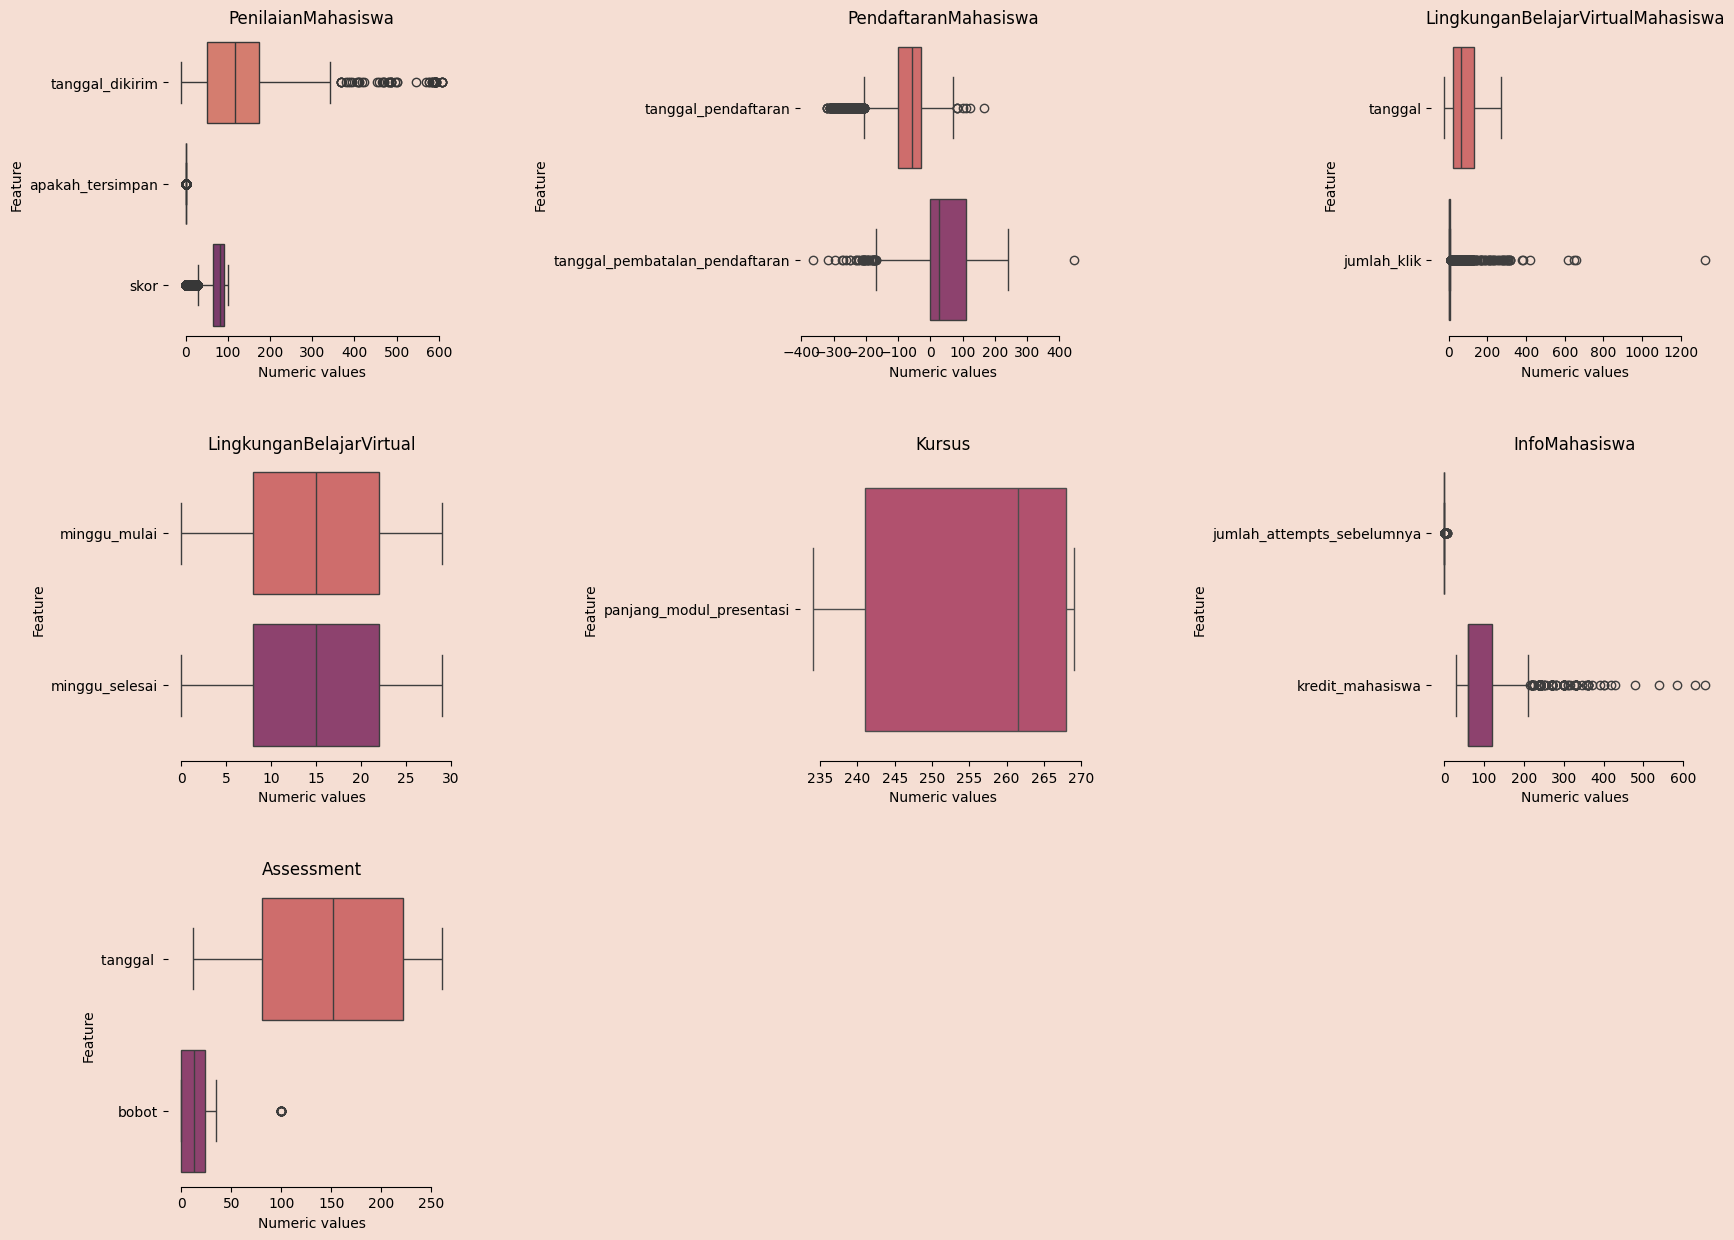

In [ ]:
plot_numeric_boxplots(dfs_impute, num_feats)

Menerapkan **winsorizing/capping** pada fitur numerik yang relevan.

In [ ]:
def cap_outliers(dfs, outlier_feats):
    copied = copy.deepcopy(dfs)

    for name, df in copied.items():
        cols_to_cap = outlier_feats[name].copy()
        bobot_cols = [col for col in df.columns if col.startswith('bobot')]
        cols_to_cap.extend(bobot_cols)

        for col in cols_to_cap:
            if col in ['jumlah_attempts_sebelumnya', 'skor', 'jumlah_klik']:
                continue
            elif col.startswith('tanggal'):
                copied[name][col] = np.where(df[col] > 366, 366, df[col])
                copied[name][col] = np.where(copied[name][col] < 0, 0, copied[name][col])
            else:
                # IQR-based capping
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                copied[name][col] = np.where(df[col] < lower_bound, lower_bound, df[col])
                copied[name][col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return copied

In [ ]:
dfs_cap = cap_outliers(dfs_impute, outlier_feats)

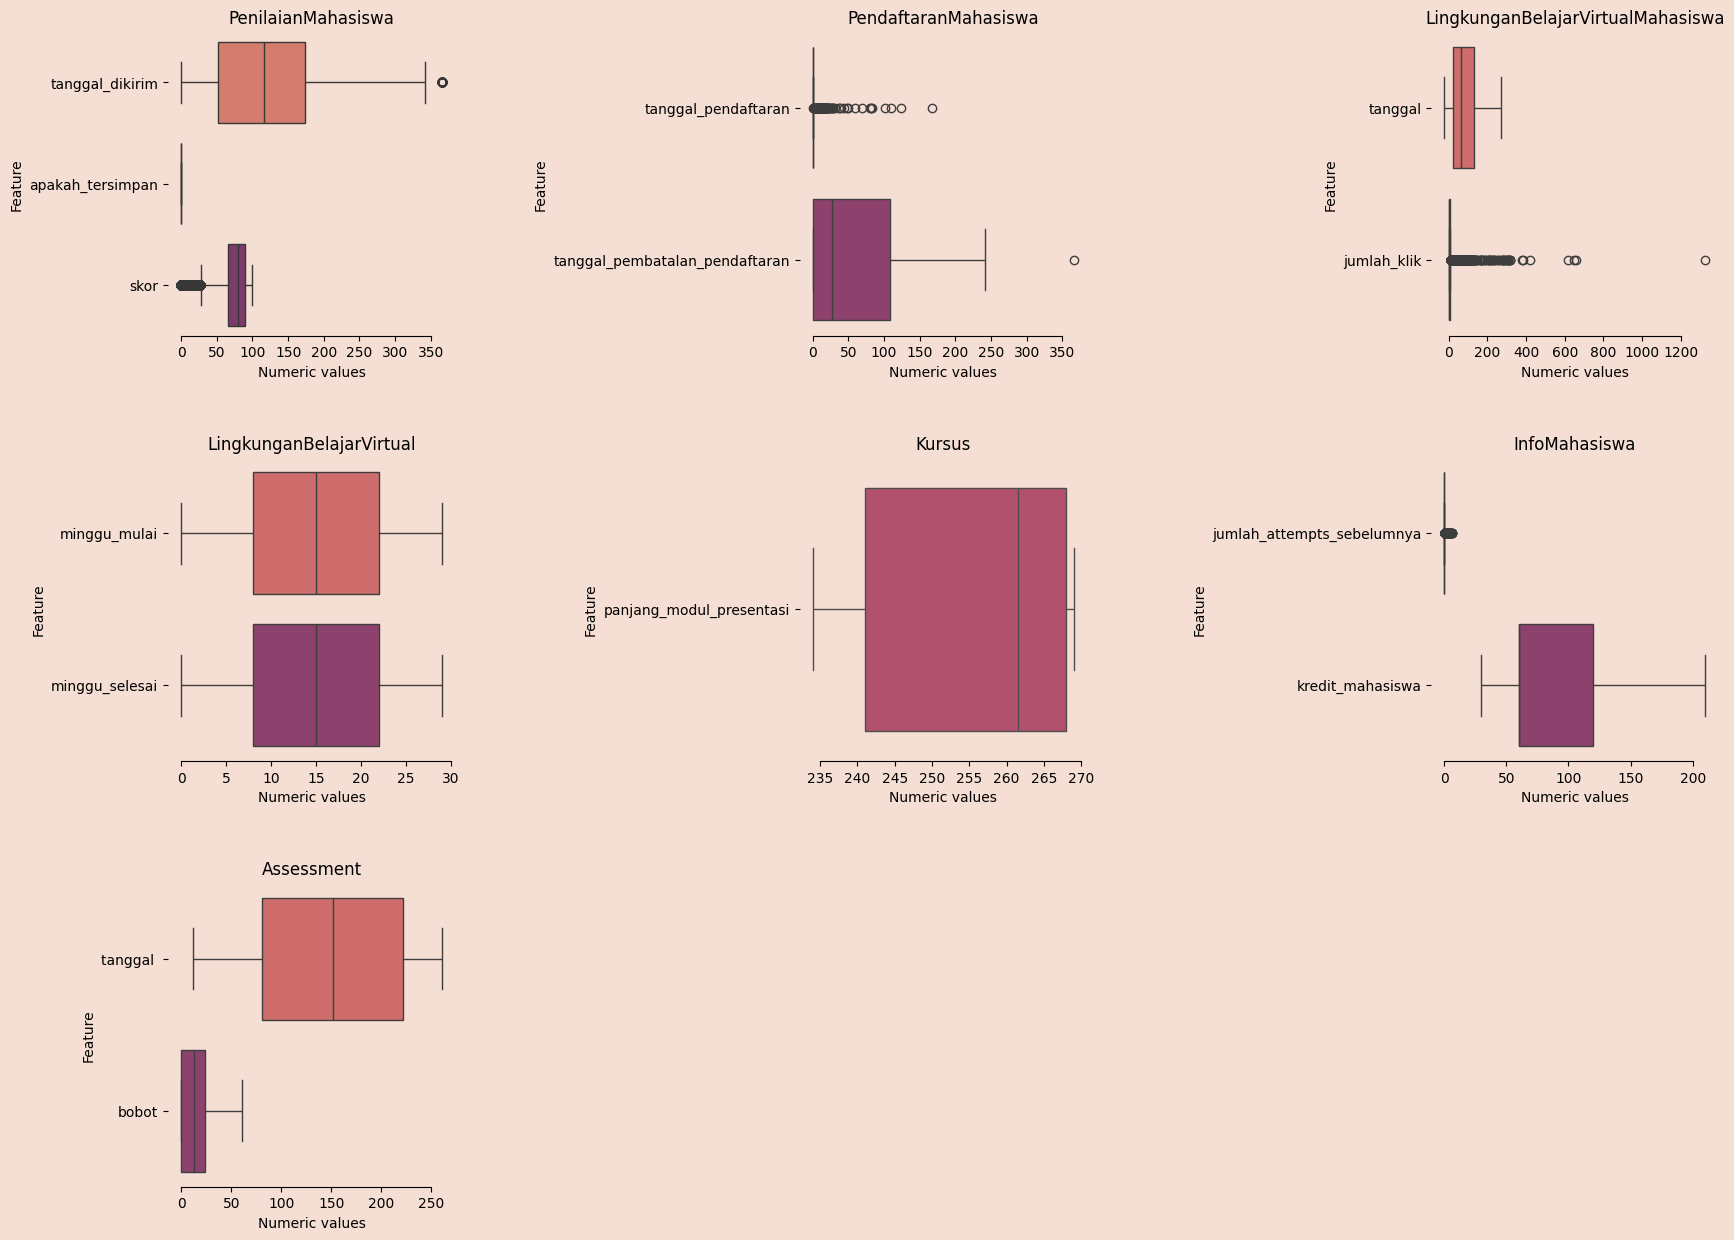

In [ ]:
plot_numeric_boxplots(dfs_cap, num_feats)

## 3.3 Penanganan Baris Duplikat

In [ ]:
dfs_clean = copy.deepcopy(dfs)

for name, df in dfs_clean.items():
    n_duplicates_before = df.duplicated().sum()
    dfs_clean[name] = df.drop_duplicates()
    n_duplicates_after = dfs_clean[name].duplicated().sum()

    print(f"{name}")
    print(f"Duplicates before: {n_duplicates_before}")
    print(f"Duplicates after: {n_duplicates_after}")
    print(f"Rows removed: {len(df) - len(dfs_clean[name])}")
    print()

PenilaianMahasiswa
Duplicates before: 0
Duplicates after: 0
Rows removed: 0

PendaftaranMahasiswa
Duplicates before: 0
Duplicates after: 0
Rows removed: 0

LingkunganBelajarVirtualMahasiswa
Duplicates before: 89529
Duplicates after: 0
Rows removed: 89529

LingkunganBelajarVirtual
Duplicates before: 0
Duplicates after: 0
Rows removed: 0

Kursus
Duplicates before: 0
Duplicates after: 0
Rows removed: 0

InfoMahasiswa
Duplicates before: 0
Duplicates after: 0
Rows removed: 0

Assessment
Duplicates before: 0
Duplicates after: 0
Rows removed: 0



---

## 2. Data Integration

In [ ]:
# unpack clean data
df_assessment   = dfs_clean['Assessment'].copy(deep=True)
df_penilaian    = dfs_clean['PenilaianMahasiswa'].copy(deep=True)
df_info         = dfs_clean['InfoMahasiswa'].copy(deep=True)
df_daftar       = dfs_clean['PendaftaranMahasiswa'].copy(deep=True)
df_kursus       = dfs_clean['Kursus'].copy(deep=True)
df_s_vle        = dfs_clean['LingkunganBelajarVirtualMahasiswa'].copy(deep=True)
df_vle          = dfs_clean['LingkunganBelajarVirtual'].copy(deep=True)

Memastikan tipe data kolom untuk join konsisten

In [ ]:
for d in (df_assessment, df_penilaian, df_info, df_daftar, df_kursus, df_s_vle, df_vle):
    for c in ['kode_modul','kode_presentasi']:
        if c in d.columns:
            d[c] = d[c].astype(str)
    if 'id_mahasiswa' in d.columns:
        d['id_mahasiswa'] = d['id_mahasiswa'].astype(int)
    if 'id_assessment' in d.columns:
        d['id_assessment'] = d['id_assessment'].astype(int)
    if 'id_situs' in d.columns:
        d['id_situs'] = d['id_situs'].astype(int)

Join InfoMahasiswa dengan PendaftaranMahasiswa pada (kode_modul, kode_presentasi, id_mahasiswa) lalu join dengan Kursus pada (kode_modul, kode_presentasi)

Join wajib menggunakan inner karena kedua "sisi" perlu berpasangan

In [ ]:
student_core = pd.merge(
    df_info,
    df_daftar,
    on=['kode_modul', 'kode_presentasi', 'id_mahasiswa'],
    how='inner',
    suffixes=('', '_pendaftaran')
)

student_core = pd.merge(
    student_core,
    df_kursus,
    on=['kode_modul', 'kode_presentasi'],
    how='inner'
)

student_core.head()

,kode_modul,kode_presentasi,id_mahasiswa,jenis_kelamin,wilayah,pendidikan_tertinggi,imd,rentang_usia,jumlah_attempts_sebelumnya,kredit_mahasiswa,disabilitas,hasil_akhir,tanggal_pendaftaran,tanggal_pembatalan_pendaftaran,panjang_modul_presentasi
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,268
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,268
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,268


Join PenilaianMahasiswa dengan Assessment pada (id_assessment)

Join inner karena alasan yang sama seperti sebelumnya

In [ ]:
assessment_full = pd.merge(
        df_penilaian,
        df_assessment,
        on='id_assessment',
        how='inner'
        )

cols_first = ['kode_modul','kode_presentasi','id_mahasiswa','id_assessment',
              'tipe_assessment','tanggal','bobot','tanggal_dikirim','apakah_tersimpan','skor']
assessment_full = assessment_full[[c for c in cols_first if c in assessment_full.columns] +
                                  [c for c in assessment_full.columns if c not in cols_first]]

assessment_full.head()

,kode_modul,kode_presentasi,id_mahasiswa,id_assessment,tipe_assessment,bobot,tanggal_dikirim,apakah_tersimpan,skor,tanggal
0,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0
1,AAA,2013J,28400,1752,TMA,10.0,22,0,70.0,19.0
2,AAA,2013J,31604,1752,TMA,10.0,17,0,72.0,19.0
3,AAA,2013J,32885,1752,TMA,10.0,26,0,69.0,19.0
4,AAA,2013J,38053,1752,TMA,10.0,19,0,79.0,19.0


Join data LingkunganBelajarVirtualMahasiswa dengan LingkunganBelajarVirtual pada (id_situs, kode_modul, kode_presentasi) untuk menggambarkan interaksi keduanya

Lalu, yang terpenting, kami melakukan agregasi pada **jumlah_klik** per (id_mahasiswa, kode_modul, kode_presentasi, tipe_aktivitas) agar ukuran data tidak **"meledak"** karena jumlah baris yang banyak (> 1 juta)

In [ ]:
vle_joined = pd.merge(
        df_s_vle,
        df_vle[['id_situs','kode_modul','kode_presentasi','tipe_aktivitas']],
        on=['id_situs','kode_modul','kode_presentasi'],
        how='inner'
        )

vle_agg = (
        vle_joined
        .groupby(['id_mahasiswa','kode_modul','kode_presentasi','tipe_aktivitas'], as_index=False)
        .agg(total_klik=('jumlah_klik','sum'),
             n_barissesi=('jumlah_klik','count'))
        )

vle_agg.head()

,id_mahasiswa,kode_modul,kode_presentasi,tipe_aktivitas,total_klik,n_barissesi
0,6516,AAA,2014J,dataplus,21,4
1,6516,AAA,2014J,forumng,392,140
2,6516,AAA,2014J,homepage,497,158
3,6516,AAA,2014J,oucontent,1488,182
4,6516,AAA,2014J,resource,31,19


In [ ]:
vle_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28336 entries, 0 to 28335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_mahasiswa     28336 non-null  int64 
 1   kode_modul       28336 non-null  object
 2   kode_presentasi  28336 non-null  object
 3   tipe_aktivitas   28336 non-null  object
 4   total_klik       28336 non-null  int64 
 5   n_barissesi      28336 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


Satukan data hasil join untuk penilaian dengan mahasiswa

In [ ]:
student_assessment = pd.merge(
        assessment_full,
        student_core,
        on=['kode_modul','kode_presentasi','id_mahasiswa'],
        how='inner',
        suffixes=('', '_student')
        )

student_assessment.shape

(173912, 22)

In [ ]:
student_assessment.head(2)

,kode_modul,kode_presentasi,id_mahasiswa,id_assessment,tipe_assessment,bobot,tanggal_dikirim,apakah_tersimpan,skor,tanggal,jenis_kelamin,wilayah,pendidikan_tertinggi,imd,rentang_usia,jumlah_attempts_sebelumnya,kredit_mahasiswa,disabilitas,hasil_akhir,tanggal_pendaftaran,tanggal_pembatalan_pendaftaran,panjang_modul_presentasi
0,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268
1,AAA,2013J,28400,1752,TMA,10.0,22,0,70.0,19.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,268


Gabungkan dengan hasil join LingkunganBelajarVirtual

Join yang digunakan adalah Left Join dari sisi "student_assessment" (hasil join sebelumnya) agar data mahasiswa-assessment tersebut tetap ada meskipun tidak mempunyai hasil interaksi LingkunganBelajarVirtual

In [ ]:
df_merged = pd.merge(
        student_assessment,
        vle_agg,
        on=['kode_modul','kode_presentasi','id_mahasiswa'],
        how='left'
        )

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352485 entries, 0 to 352484
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   kode_modul                      352485 non-null  object 
 1   kode_presentasi                 352485 non-null  object 
 2   id_mahasiswa                    352485 non-null  int64  
 3   id_assessment                   352485 non-null  int64  
 4   tipe_assessment                 352485 non-null  object 
 5   bobot                           352485 non-null  float64
 6   tanggal_dikirim                 352485 non-null  int64  
 7   apakah_tersimpan                352485 non-null  int64  
 8   skor                            352156 non-null  float64
 9   tanggal                         349620 non-null  float64
 10  jenis_kelamin                   352485 non-null  object 
 11  wilayah                         352485 non-null  object 
 12  pendidikan_terti

In [ ]:
df_merged.head()

,kode_modul,kode_presentasi,id_mahasiswa,id_assessment,tipe_assessment,bobot,tanggal_dikirim,apakah_tersimpan,skor,tanggal,jenis_kelamin,wilayah,pendidikan_tertinggi,imd,rentang_usia,jumlah_attempts_sebelumnya,kredit_mahasiswa,disabilitas,hasil_akhir,tanggal_pendaftaran,tanggal_pembatalan_pendaftaran,panjang_modul_presentasi,tipe_aktivitas,total_klik,n_barissesi
0,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,forumng,181.0,48.0
1,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,homepage,138.0,40.0
2,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,oucontent,553.0,78.0
3,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,resource,13.0,11.0
4,AAA,2013J,11391,1752,TMA,10.0,18,0,78.0,19.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,subpage,32.0,11.0


In [ ]:
df_merged.isna().sum()

,0
kode_modul,0
kode_presentasi,0
id_mahasiswa,0
id_assessment,0
tipe_assessment,0
bobot,0
tanggal_dikirim,0
apakah_tersimpan,0
skor,329
tanggal,2865


#### CATATAN

Dari hasil *isna().sum()* tersebut kolom `tanggal_pembatalan_pendaftaran` memiliki banyak NaN karena hanya terisi untuk yang benar-benar batal jadi wajar.

Lalu untuk `tipe_aktivitas`, `total_klik`, dan `n_barissesi` memiliki banyak NaN karena hasil *left-join* sehingga baris yang tidak memiliki nilai dan hal yang wajar.


In [ ]:
from sklearn.impute import SimpleImputer
import copy

df_filled = copy.deepcopy(df_merged)
df_filled.columns = df_merged.columns.str.strip()

df_filled['batal'] = df_filled['tanggal_pembatalan_pendaftaran'].notna().astype(int)
df_filled.drop(columns=['tanggal_pembatalan_pendaftaran', 'id_mahasiswa', 'id_assessment'], inplace=True)

num_impute_cols = ["skor", "tanggal", "total_klik", "n_barissesi", "tanggal_pendaftaran"]
cat_impute_cols = ["imd", "tipe_aktivitas"]

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

for col in num_impute_cols:
    if col in df_filled.columns:
        df_filled[col] = numerical_imputer.fit_transform(df_filled[[col]]).ravel()
        print(f"Imputed '{col}' with median")

for col in cat_impute_cols:
    if col in df_filled.columns:
        df_filled[col] = categorical_imputer.fit_transform(df_filled[[col]]).ravel()
        print(f"Imputed '{col}' with most frequent")

print(f"\nMissing values after imputation:")
print(df_filled[num_impute_cols + cat_impute_cols + ['batal']].isnull().sum())

Imputed 'skor' with median
Imputed 'tanggal' with median
Imputed 'total_klik' with median
Imputed 'n_barissesi' with median
Imputed 'tanggal_pendaftaran' with median
Imputed 'imd' with most frequent
Imputed 'tipe_aktivitas' with most frequent

Missing values after imputation:
skor                   0
tanggal                0
total_klik             0
n_barissesi            0
tanggal_pendaftaran    0
imd                    0
tipe_aktivitas         0
batal                  0
dtype: int64


---

## 3. Data Transformation
Scaling & Encoding menggunakan `ColumnTransformer + Pipeline`. Jangan lupa pisahkan label pada data terlebih dahulu

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

list_feature_num_robust = ["total_klik", "n_barissesi"]
list_feature_num_std = ["bobot", "tanggal_dikirim", "skor", "jumlah_attempts_sebelumnya",
                        "tanggal_pendaftaran",
                        "panjang_modul_presentasi", "kredit_mahasiswa"]
list_feature_cat_onehot = ["kode_modul", "kode_presentasi", "tipe_assessment", "jenis_kelamin",
                           "wilayah", "tipe_aktivitas"]
list_feature_cat_ordinal = ["imd", "rentang_usia", "disabilitas", "pendidikan_tertinggi", "hasil_akhir"]

# Numerical transformers
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_std_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical transformers
cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

cat_ordinal_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num_robust", num_robust_transformer, list_feature_num_robust),
        ("num_standard", num_std_transformer, list_feature_num_std),
        ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
        ("cat_ordinal", cat_ordinal_transformer, list_feature_cat_ordinal)
    ],
    remainder='passthrough'  # keep other columns unchanged
)

# fit and transform
temp = preprocessor.fit_transform(df_filled)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()

if hasattr(temp, 'toarray'):
    temp = temp.toarray()

df_transform = pd.DataFrame(temp, columns=list_feature_prepared)

print(f"Original shape: {df_merged.shape}")
print(f"Transformed shape: {df_transform.shape}")

Original shape: (352485, 25)
Transformed shape: (352485, 58)


---

## 4. Data Reduction / Compression — Feature Selection

Kami memilih SelectKBest(mutual_info) (K=20) karena mampu menangkap **hubungan non-linier dan menyaring fitur paling informatif** untuk hasil_akhir **tanpa mengorbankan interpretabilitas**

In [ ]:
def mask_corr_matrix(df, p, t):
    
    plt.figure(figsize = (p,t))
    temp = df.copy(deep = True)

    corr = temp.corr()
    filter = np.zeros_like(corr, dtype=bool)

    half = np.triu(np.ones_like(corr, dtype=bool))
    sns.set_context("notebook", font_scale=0.8)
    
    heatmap = sns.heatmap(corr, mask = filter | half, annot=True, fmt=".3f", cmap = Settings.CMAP, linewidths=0.2, xticklabels=True, yticklabels=True)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# mask_corr_matrix(train, 12, 8)

In [ ]:
X = df_transform.drop(columns=['cat_ordinal__hasil_akhir'])
y = df_transform['cat_ordinal__hasil_akhir']

k_best = SelectKBest(score_func=mutual_info_classif, k=20)
X_kbest = k_best.fit_transform(X, y)

selected_features_kbest = X.columns[k_best.get_support()]

print("\nSelectKBest Feature Selection:")
print(f"Original number of features: {X.shape[1]}")
print(f"Number of selected features (K=20): {X_kbest.shape[1]}")
print("\nSelected features (SelectKBest):")
print(selected_features_kbest.tolist())

df_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)
df_kbest["cat_ordinal__hasil_akhir"] = y.values

print("\nShape of the dataframe after SelectKBest:")
print(df_kbest.shape)


SelectKBest Feature Selection:
Original number of features: 57
Number of selected features (K=20): 20

Selected features (SelectKBest):
['num_robust__total_klik', 'num_robust__n_barissesi', 'num_standard__bobot', 'num_standard__tanggal_dikirim', 'num_standard__skor', 'num_standard__jumlah_attempts_sebelumnya', 'num_standard__tanggal_pendaftaran', 'num_standard__panjang_modul_presentasi', 'num_standard__kredit_mahasiswa', 'cat_onehot__kode_modul_BBB', 'cat_onehot__kode_presentasi_2013J', 'cat_onehot__tipe_assessment_CMA', 'cat_onehot__tipe_assessment_TMA', 'cat_onehot__jenis_kelamin_F', 'cat_onehot__tipe_aktivitas_homepage', 'cat_ordinal__imd', 'cat_ordinal__rentang_usia', 'cat_ordinal__pendidikan_tertinggi', 'remainder__tanggal', 'remainder__batal']

Shape of the dataframe after SelectKBest:
(352485, 21)


---

## 5. Pipelining

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Modelling <a name="4"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## 1. Desain Pemodelan

In [ ]:
X = df_kbest.drop(columns=[Settings.TARGET])
y = df_kbest[Settings.TARGET]

In [ ]:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

## 1.1 *Hold-out validation*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=Settings.SEED, stratify=y)

In [ ]:
# unique_labels = np.unique(y_val)
# target_names = label_encoder.inverse_transform(unique_labels)

In [ ]:
def train_model_holdout(model, X_train, X_val, y_train, y_val, task='classification'):

    model_name = model.__class__.__name__
    
    print(f"Training {model_name} with hold-out validation")
    
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    
    if task == 'classification':
        results = {
            'accuracy': accuracy_score(y_val, val_preds),
            'f1_macro': f1_score(y_val, val_preds, average='macro'),
            'f1_weighted': f1_score(y_val, val_preds, average='weighted'),
            'precision': precision_score(y_val, val_preds, average='weighted'),
            'recall': recall_score(y_val, val_preds, average='weighted')
        }
    else:  # regression
        results = {
            'mae': mean_absolute_error(y_val, val_preds),
            'mse': mean_squared_error(y_val, val_preds),
            'rmse': np.sqrt(mean_squared_error(y_val, val_preds)),
            'r2': r2_score(y_val, val_preds),
        }
    
    print("\nValidation Results:")
    for metric, value in results.items():
        print(f"  {metric}: {value:.4f}")
    
    return {
        'results': results,
        'model': model,
        'predictions': val_preds
    }

In [ ]:
# Usage
# results_clf = train_model_holdout(model, X_train, X_val, y_train, y_val, task='classification')
# results_reg = train_model_holdout(model, X_train, X_val, y_train, y_val, task='regression')

### 1.2. *K-fold validation*

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Settings.SEED)

In [ ]:
def train_model_cv(model, X, y, cv, task='classification'):

    n_splits = cv.n_splits
    model_name = model.__class__.__name__
    
    print(f"Training {model_name} with {n_splits}-fold cross-validation")

    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        print(f"\nFold {fold + 1}/{n_splits}")
        print("-" * 60)
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        val_preds = model.predict(X_val)

        if task == 'classification':
            results = {
                'accuracy': accuracy_score(y_val, val_preds),
                'f1_macro': f1_score(y_val, val_preds, average='macro'),
                'f1_weighted': f1_score(y_val, val_preds, average='weighted'),
                'precision': precision_score(y_val, val_preds, average='weighted'),
                'recall': recall_score(y_val, val_preds, average='weighted')
            }
        else:  # regression
            results = {
                'mae': mean_absolute_error(y_val, val_preds),
                'mse': mean_squared_error(y_val, val_preds),
                'rmse': np.sqrt(mean_squared_error(y_val, val_preds)),
                'r2': r2_score(y_val, val_preds),
            }
        
        fold_results.append(results)

        print(f"Fold {fold + 1} results:")
        for metric, value in results.items():
            print(f"  {metric}: {value:.4f}")

    print("Aggregated Results Across All Folds:")

    df_results = pd.DataFrame(fold_results)
    print(df_results)

    print("\nMean Metrics:")
    mean_metrics = df_results.mean().to_dict()
    for metric, value in mean_metrics.items():
        print(f"  {metric}: {value:.4f}")
    
    return {
        'fold_results': fold_results,
        'mean_metrics': mean_metrics,
        'results_df': df_results,
        'model': model
    }

In [ ]:
# Usage:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Configs.SEED)
# results_clf = train_model_cv(model, X, y, cv=skf, task='classification')

# # Regression
# kf = KFold(n_splits=5, shuffle=True, random_state=Configs.SEED)
# results_reg = train_model_cv(model, X, y, cv=kf, task='regression')

### 1.3 *Class Weight*

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
sample_weights = np.array([class_weight_dict[label] for label in y_train])

### 1.4 Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, target_names):

    unique_labels = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

    fig, ax = plt.subplots(figsize=(8, 6), facecolor='#fff0d1')
    fig.patch.set_linewidth(2)
    fig.patch.set_edgecolor('black')

    ax = sns.heatmap(cm_df, annot=True, fmt='d', cmap=Settings.CMAP)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")

    plt.tight_layout()
    plt.show()

---

## 2. KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, random_state=Settings.SEED)
knn = KNeighborsRegressor(n_neighbors=5, random_state=Settings.SEED)

In [ ]:
knn_ho_results = train_model_holdout(knn, X_train, X_val, y_train, y_val, task='classification')

In [ ]:
knn_cv_results = train_model_cv(knn, X, y, skf, task='classification')

In [ ]:
# print(classification_report(y_val, knn_ho_results['predictions'], labels=unique_labels, target_names=target_names, zero_division=0))

In [ ]:
# plot_confusion_matrix(y_val, knn_ho_results['predictions'], target_names)

---

## 3. DTL

In [ ]:
dtl = DecisionTreeClassifier(random_state=Settings.SEED)
dtl = DecisionTreeRegressor(random_state=Settings.SEED)

In [ ]:
dtl_ho_results = train_model_holdout(dtl, X_train, X_val, y_train, y_val, task='classification')

In [ ]:
dtl_cv_results = train_model_cv(dtl, X, y, skf, task='classification')

In [ ]:
# print(classification_report(y_val, dtl_ho_results['predictions'], labels=unique_labels, target_names=target_names, zero_division=0))

In [ ]:
# plot_confusion_matrix(y_val, knn_ho_results['predictions'], target_names)

---

## 4. Linear Model

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=Settings.SEED)
lr = LinearRegression()

In [ ]:
lr_ho_results = train_model_holdout(lr, X_train, X_val, y_train, y_val, task='classification')

In [ ]:
lr_cv_results = train_model_cv(lr, X, y, skf, task='classification')

In [ ]:
# print(classification_report(y_val, dtl_ho_results['predictions'], labels=unique_labels, target_names=target_names, zero_division=0))

In [ ]:
# plot_confusion_matrix(y_val, knn_ho_results['predictions'], target_names)

---

## 5. SVM

In [ ]:
svm = SVC(random_state=Settings.SEED)
svm = SVR(random_state=Settings.SEED)

In [ ]:
svm_ho_results = train_model_holdout(svm, X_train, X_val, y_train, y_val, task='classification')

In [ ]:
svm_cv_results = train_model_cv(svm, X, y, skf, task='classification')

In [ ]:
# print(classification_report(y_val, dtl_ho_results['predictions'], labels=unique_labels, target_names=target_names, zero_division=0))

In [ ]:
# plot_confusion_matrix(y_val, knn_ho_results['predictions'], target_names)

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Inference <a name="5"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

In [ ]:
best_model = ''

In [ ]:
# test = pd.read_csv('TestDataset.csv')

# preprocessing_pipeline = Pipeline([
#     ('missing_values', MissingValueHandler()),
#     ('log_transform', LogTransformation()),
#     ('binning', FeatureBinning()),
#     ('interactions', InteractionFeatures()),
#     ('ratios', RatioFeatures()),
#     # ('aggregations', AggregationFeatures()),
#     ('clean_names', ColumnNameCleaner())
# ])

# X_processed = preprocessing_pipeline.fit_transform(train.drop(columns=[Settings.TARGET]))
# X_test_processed = preprocessing_pipeline.transform(test)